# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Garrett Kopp 

#### Github Link: https://github.com/ggkopp/620_Module_6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [19]:
import requests
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    
    with open("Mod6_html.pkl", "wb") as file:
        pickle.dump(html_content, file)
        
    print("HTML content saved to article_html.pkl")
else:
    print("Failed to fetch the HTML content.")

HTML content saved to article_html.pkl


### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [20]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the pickle file
with open("Mod6_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract and print the text using .get_text()
article_text = soup.get_text()

print(article_text)
















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype l

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [21]:
import pickle
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load the HTML content from the pickle file
with open("Mod6_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML using BeautifulSoup and extract the text
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not (token.is_punct or token.is_space or token.text.lower() in STOP_WORDS)]

# Calculate token frequencies
token_frequencies = Counter(filtered_tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_frequencies.most_common(5)

# Print common tokens with labels
print("5 Most Common Tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print tokens and their frequencies
print("\nToken Frequencies:")
for token, frequency in token_frequencies.items():
    print(f"{token}: {frequency}")

5 Most Common Tokens:
comment: 136
march: 133
2021: 133
says: 132
report: 130

Token Frequencies:
laser: 63
headlights: 56
work: 8
|: 4
hackaday: 15
skip: 1
content: 1
primary: 1
menu: 1
home: 6
blog: 2
hackaday.io: 3
tindie: 2
prize: 3
submit: 2
search: 5
march: 133
27: 5
2021: 133
130: 4
comments: 21
lewin: 2
day: 9
22: 79
think: 14
onward: 1
automotive: 10
technology: 15
usually: 1
thing: 4
come: 8
mind: 6
engines: 1
fuel: 3
efficiency: 18
switch: 5
electric: 2
power: 12
mean: 4
thousands: 1
engineers: 3
world: 6
working: 5
improve: 1
state: 3
art: 3
lighting: 18
sealed: 5
beam: 26
gave: 1
way: 17
modern: 3
designs: 3
regulations: 4
loosened: 1
bulbs: 9
moved: 3
simple: 5
halogens: 3
xenon: 6
hids: 1
recently: 1
leds: 15
new: 16
scene: 1
lasers: 9
bwm: 2
prototype: 2
headlight: 24
assemblies: 1
undergoing: 1
testing: 2
image: 3
brought: 1
phrase: 1
beams: 27
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 68
poor: 4
illumination: 7
outside: 3
specific: 1
spo

### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [22]:
import pickle
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load the HTML content from the pickle file
with open("Mod6_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML using BeautifulSoup and extract the text
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and get lemmas
filtered_lemmas = [token.lemma_.lower() for token in doc if not (token.is_punct or token.is_space or token.lemma_.lower() in STOP_WORDS)]

# Calculate lemma frequencies
lemma_frequencies = Counter(filtered_lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Print common lemmas with labels
print("5 Most Common Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print lemmas and their frequencies
print("\nLemma Frequencies:")
for lemma, frequency in lemma_frequencies.items():
    print(f"{lemma}: {frequency}")

5 Most Common Lemmas:
comment: 156
march: 133
2021: 133
report: 130
reply: 112

Lemma Frequencies:
laser: 72
headlights: 7
work: 19
|: 4
hackaday: 15
skip: 1
content: 1
primary: 1
menu: 1
home: 6
blog: 2
hackaday.io: 3
tindie: 2
prize: 3
submit: 2
search: 5
march: 133
27: 5
2021: 133
130: 4
comments: 1
lewin: 2
day: 11
22: 79
think: 17
onward: 1
automotive: 10
technology: 17
headlight: 73
usually: 1
thing: 12
come: 17
mind: 6
engine: 3
fuel: 3
efficiency: 19
switch: 8
electric: 2
power: 13
mean: 9
thousand: 2
engineer: 4
world: 6
improve: 3
state: 4
art: 3
lighting: 16
seal: 4
beam: 53
way: 19
modern: 3
design: 14
regulation: 4
loosen: 1
bulb: 9
simple: 5
halogen: 7
xenon: 6
hids: 1
recently: 1
led: 30
new: 16
scene: 1
bwm: 2
prototype: 2
assembly: 2
undergo: 1
testing: 1
image: 3
bring: 3
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 99
poor: 4
illumination: 7
outside: 3
specific: 1
spot: 5
distance: 7
away: 9
thankfully: 2
eye: 16
instead: 4
consist

### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [23]:
# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculate the score of a sentence based on interesting tokens.

    Args:
        sentence (str): The input sentence.
        interesting_tokens (list): List of interesting tokens.

    Returns:
        float: The score of the sentence based on interesting tokens.
    """
    doc = nlp(sentence)
    num_words = len(doc)
    num_interesting_tokens = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    
    if num_words == 0:
        return 0.0
    
    return num_interesting_tokens / num_words

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculate the score of a sentence based on interesting lemmas.

    Args:
        sentence (str): The input sentence.
        interesting_lemmas (list): List of interesting lemmas.

    Returns:
        float: The score of the sentence based on interesting lemmas.
    """
    doc = nlp(sentence)
    num_words = len(doc)
    num_interesting_lemmas = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    
    if num_words == 0:
        return 0.0
    
    return num_interesting_lemmas / num_words

# Example usage
interesting_tokens = ["laser", "headlights", "technology"]
interesting_lemmas = ["laser", "headlight", "technology"]

sentence = "Laser headlights are an innovative technology used in modern cars."
token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

print(f"Token Score: {token_score:.2f}")
print(f"Lemma Score: {lemma_score:.2f}")

Token Score: 0.27
Lemma Score: 0.27


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

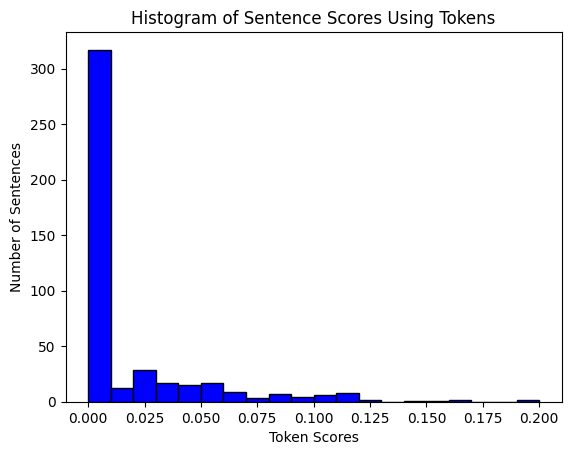

In [24]:
import pickle
import spacy
import matplotlib.pyplot as plt

# Load the HTML content from the pickle file
with open("Mod6_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML using BeautifulSoup and extract the text
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Tokenize sentences
doc = nlp(article_text)
sentences = [sent.text for sent in doc.sents]

# Frequent tokens identified earlier
frequent_tokens = ["laser", "headlights", "technology", "light", "system"]

# Calculate scores for each sentence
token_scores = [score_sentence_by_token(sent, frequent_tokens) for sent in sentences]

# Create a histogram of scores
plt.hist(token_scores, bins=20, color='blue', edgecolor='black')
plt.xlabel('Token Scores')
plt.ylabel('Number of Sentences')
plt.title('Histogram of Sentence Scores Using Tokens')
plt.show()

### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

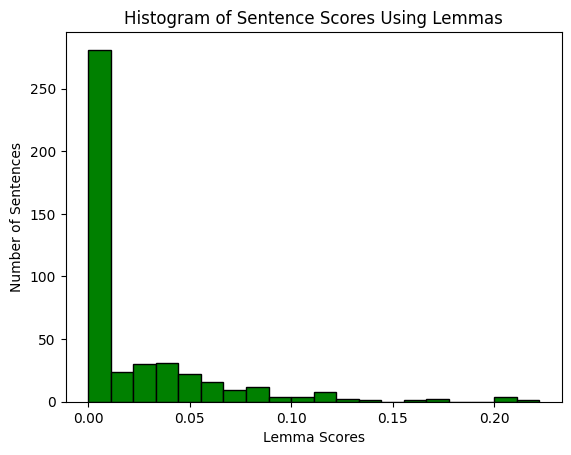

In [25]:
import pickle
import spacy
import matplotlib.pyplot as plt

# Load the HTML content from the pickle file
with open("Mod6_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML using BeautifulSoup and extract the text
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Tokenize sentences
doc = nlp(article_text)
sentences = [sent.text for sent in doc.sents]

# Frequent lemmas identified earlier
frequent_lemmas = ["laser", "headlight", "technology", "light", "system"]

# Calculate scores for each sentence using lemmas
lemma_scores = [score_sentence_by_lemma(sent, frequent_lemmas) for sent in sentences]

# Create a histogram of scores
plt.hist(lemma_scores, bins=20, color='green', edgecolor='black')
plt.xlabel('Lemma Scores')
plt.ylabel('Number of Sentences')
plt.title('Histogram of Sentence Scores Using Lemmas')
plt.show()

### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

##### From the list of most common tokens (using lemmas) that would be omitted:

"be"
"have"
"use"
"do"
"work"

##### From the list of most common lemmas (using lemmas) that would be omitted:

"be"
"have"
"use"
"do"
"work"

### How the code would change to ommit nouns

##### Filter out punctuation, stopwords, whitespace, and consider only nouns
filtered_noun_tokens = [token.text.lower() for token in doc if not (token.is_punct or token.is_space or token.text.lower() in STOP_WORDS) and token.pos_ == 'NOUN']
filtered_noun_lemmas = [token.lemma_.lower() for token in doc if not (token.is_punct or token.is_space or token.lemma_.lower() in STOP_WORDS) and token.pos_ == 'NOUN']

In [1]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] Writing 821469 bytes to web-scraping.html
